# Q22 from the 2012 PAT paper
> "An investigation into the model from Q22 of the 2012 PAT."
- branch: master
- badges: true
- comments: true
- author: Peter Sharp
- categories: [jupyter, physics, pat]
- use_math: true
- image: images/copied_from_nb/pat-2012-q22.png

> Tip: Click "Launch Binder" above to open a functioning version of the notebook in [binder](https://mybinder.org) or "View in Github" to download to your own machine. Note the binder instance may take some time to load.

In [1]:
#hide
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib notebook

# Question
![The Question](pat-2012-q22.png)

The first stage is to recreate the force function in Python

In [2]:
def force(x):
    if (x>0):
        f = -10
    else:
        f = -x-10 # equation of graph for x<0
    return f

<IPython.core.display.Javascript object>


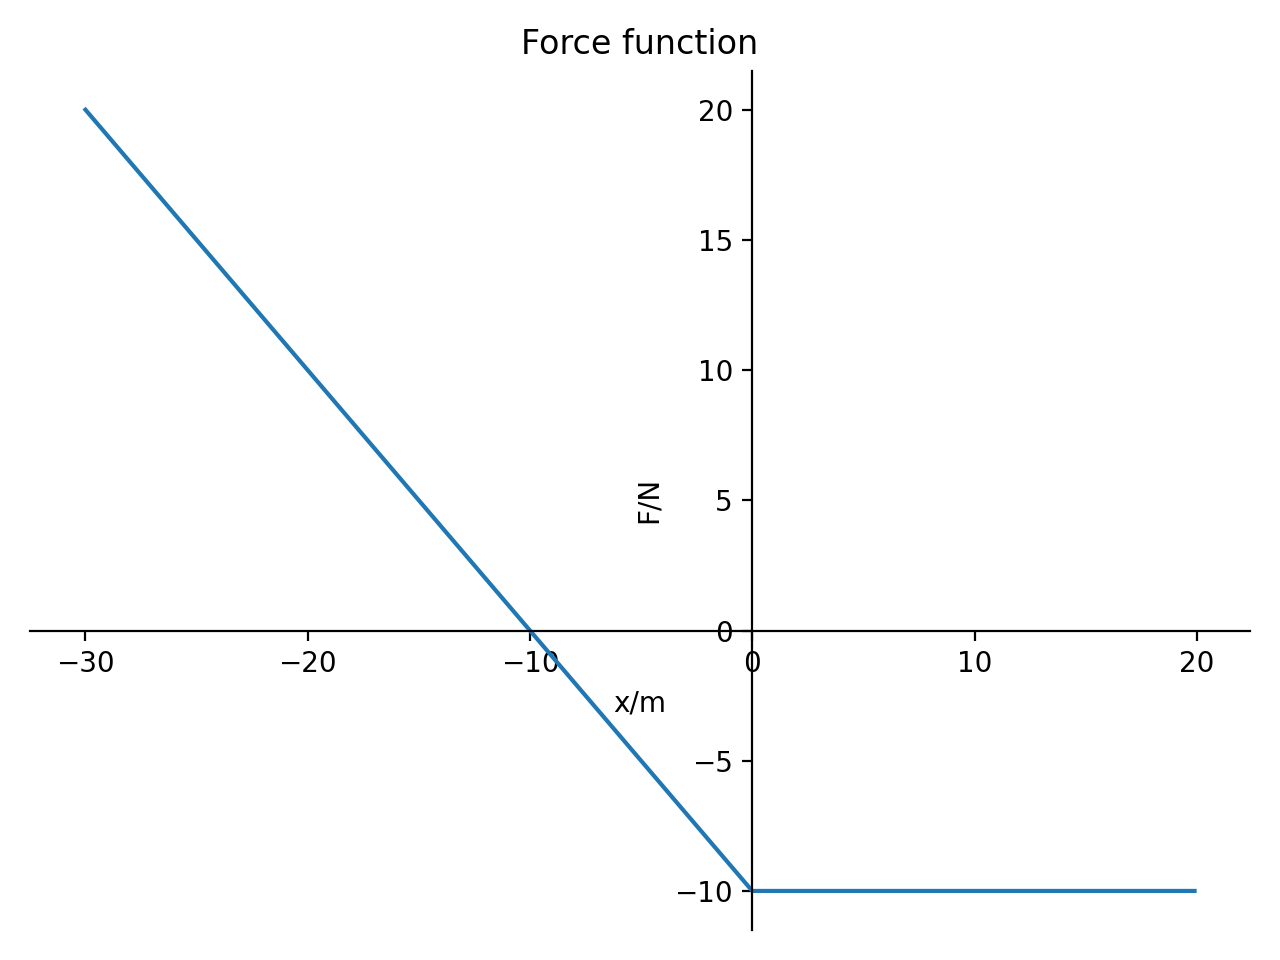

In [3]:
#collapse-hide
x = np.arange(-30,20,0.1)
f = []
for val in x:
    f.append(force(val))
fig, ax = plt.subplots()
ax.plot(x,f)
ax.set_xlabel("x/m")
ax.set_ylabel("F/N")
ax.set_title("Force function")
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
fig.tight_layout()

This is an interesting problem which demonstrates motion with a non-linear force-function. To visualise this motion python can be used to solve the differential equations for the motion using `scipy.integrate.solve_ivp`:

$$ \frac{dx}{dt} = v \\
\frac{dv}{dt} = -\frac{F}{m}
$$


<IPython.core.display.Javascript object>


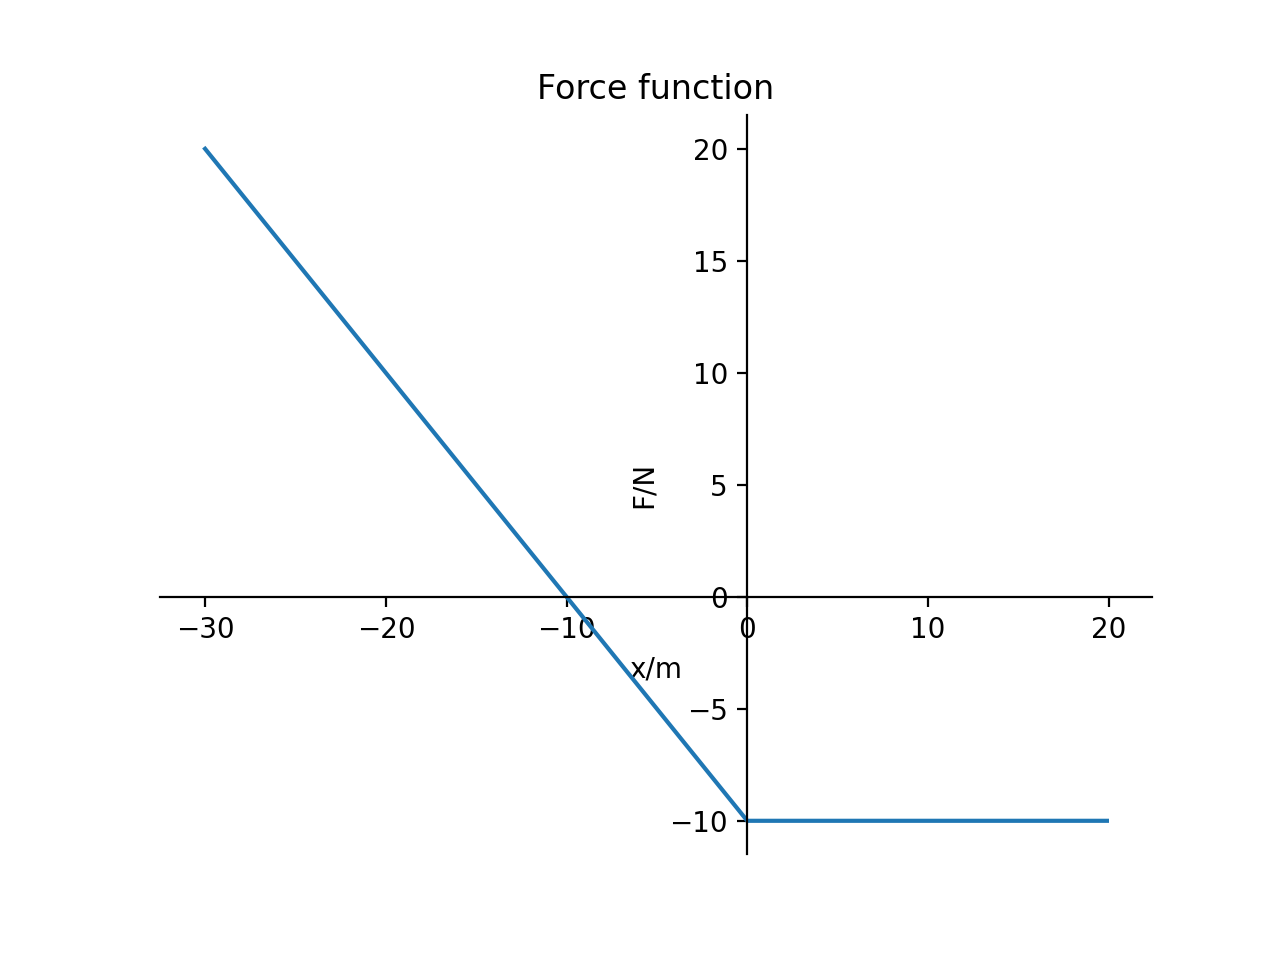

In [4]:
#collapse-hide
initialP = [10,0] # [x,v]
mass = 1

def ivf(t, P):
    dxdt = P[1] # dx/dt = v
    dvdt = force(P[0]) / mass # dv/dt = F/m
    return [dxdt, dvdt]

t_max = 10
t_range = np.arange(0,t_max,0.05)
sol = solve_ivp(ivf, [0,t_max], initialP, t_eval=t_range) # sol.t, sol.y[0] = x, sol.y[1] = v
from matplotlib import animation
fig2, ax2 = plt.subplots()
ax2.plot(x,f)
ax2.set_xlabel("x/m")
ax2.set_ylabel("F/N")
ax2.set_title("Force function")
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_color('none')
fig.tight_layout()
pt, = ax2.plot([],[],color='r',marker="o", markersize=20)
def update_point(t):
    pt.set_data(sol.y[0][t],0)
    return pt,
ani=animation.FuncAnimation(fig2, update_point, len(t_range), interval=10, blit=True, repeat=False)

## a1 What is its speed at x=0?

This can be solved analytically:
$$ \text{Kinetic Energy} = \text{Work done}\\
\frac{1}{2}mv^2 = Fs $$
to give $v=10\sqrt{2}=14.1\text{ ms}^{-1}

It can also be verified from the phase plot

<IPython.core.display.Javascript object>


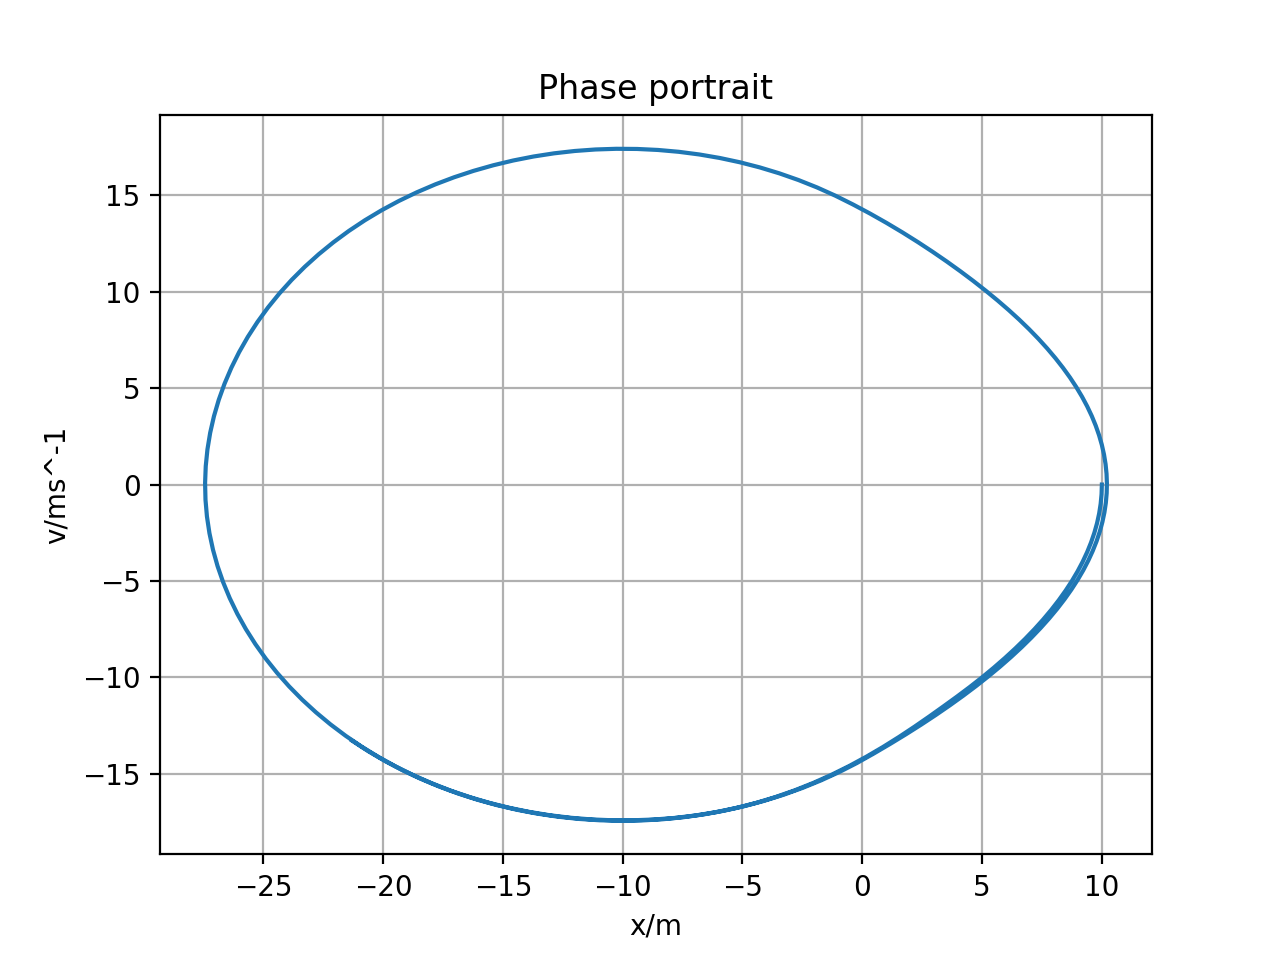

In [5]:
#collapse-hide
fig3, ax3 = plt.subplots()
ax3.set_xlabel("x/m")
ax3.set_ylabel("v/ms^-1")
ax3.set_title("Phase portrait")
ax3.plot(sol.y[0],sol.y[1])
ax3.grid()
fig.tight_layout()

## a2 Sketch its kinetic energy as a function of x.

Now we have the solution this is easily done.

<IPython.core.display.Javascript object>


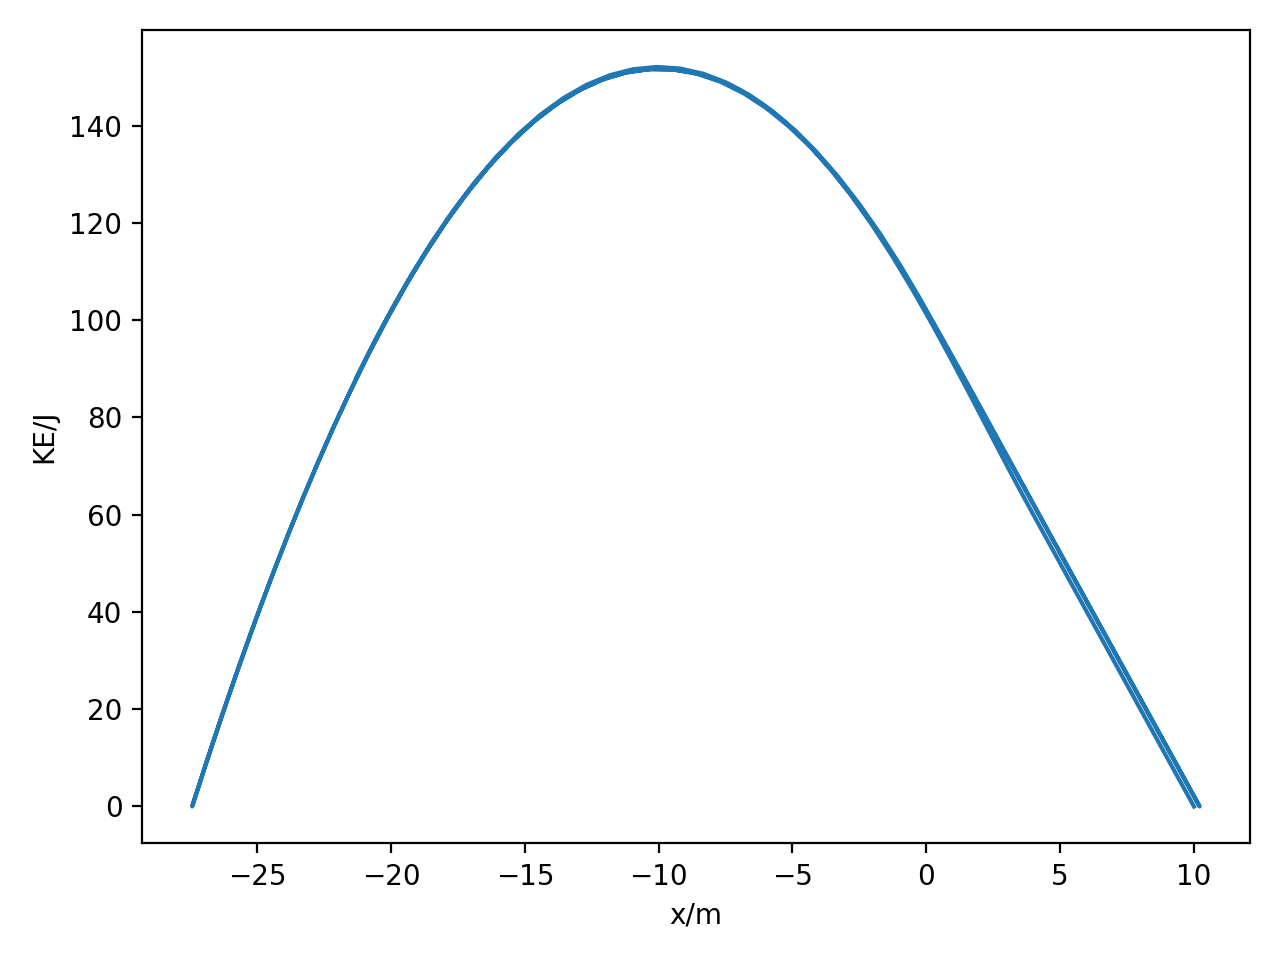

In [6]:
#collapse-hide
KE = 0.5*mass*sol.y[1]**2

fig4, ax4 = plt.subplots()
ax4.set_xlabel("x/m")
ax4.set_ylabel("KE/J")
ax4.plot(sol.y[0],KE)
ax4.grid()
fig4.tight_layout()

## a3 Sketch its velocity as well as its acceleration as a function of time t.

<IPython.core.display.Javascript object>


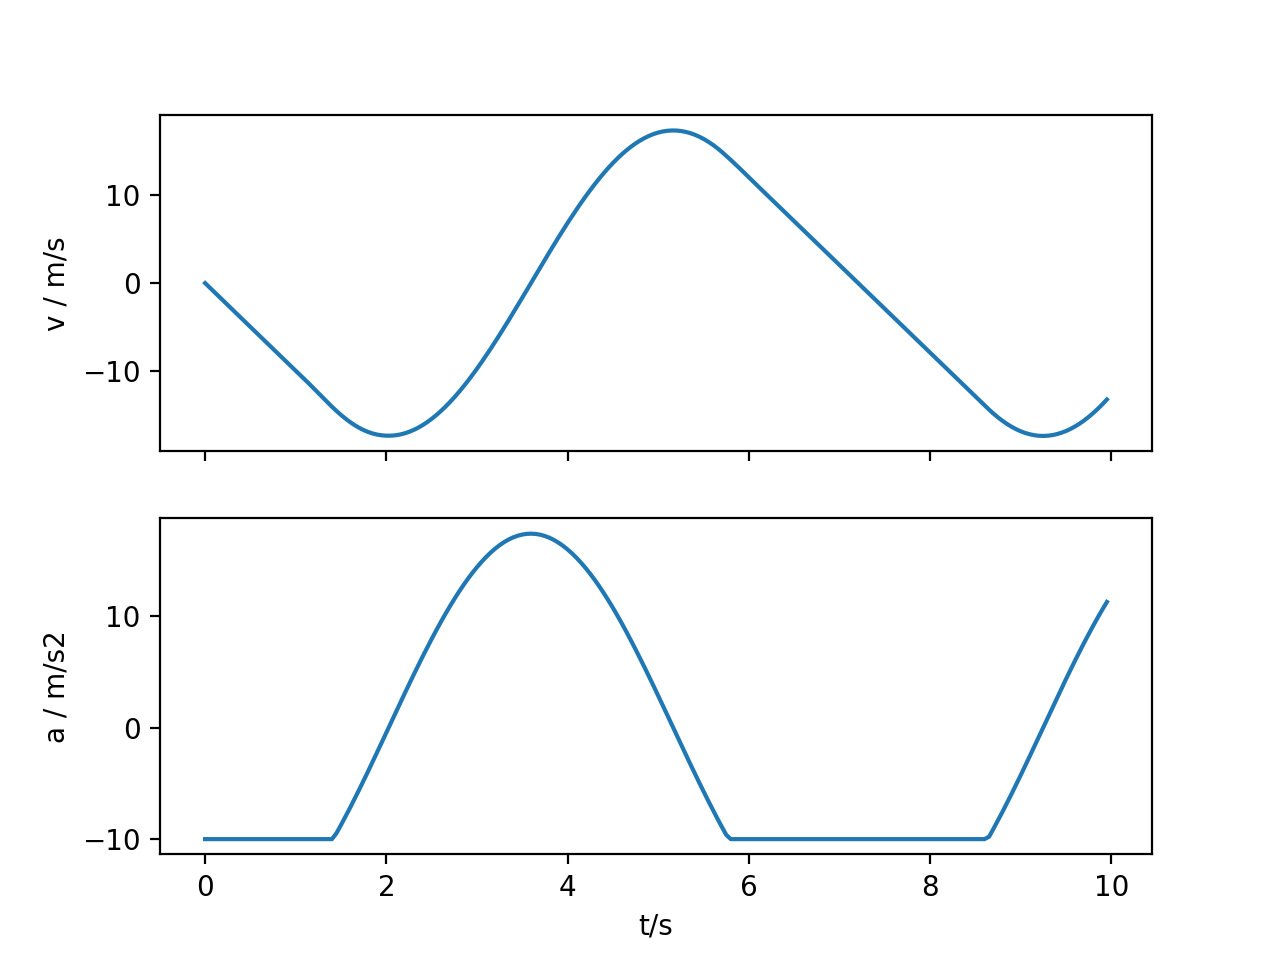

In [7]:
#collapse-hide
forces = [force(x)/mass for x in sol.y[0]]
fig5, ax5 = plt.subplots(2,sharex=True)
ax5[1].set_xlabel("t/s")
ax5[0].set_ylabel("v / m/s")
ax5[0].plot(sol.t,sol.y[1])
ax5[1].set_ylabel("a / m/s2")
ax5[1].plot(sol.t,forces)
ax4.grid()
fig4.tight_layout()

## Now consider a case when, in addition, a friction force of a magnitude of 1 N is present for x ≥ 0.

## b1 Sketch how the velocity depends on x in that case.

This requires a new force function including a velocity dependance.

In [8]:
def force2(x,v):
    if (x>0):
        f = -10 - np.sign(v)
    else:
        f = -x-10
    return f


<IPython.core.display.Javascript object>


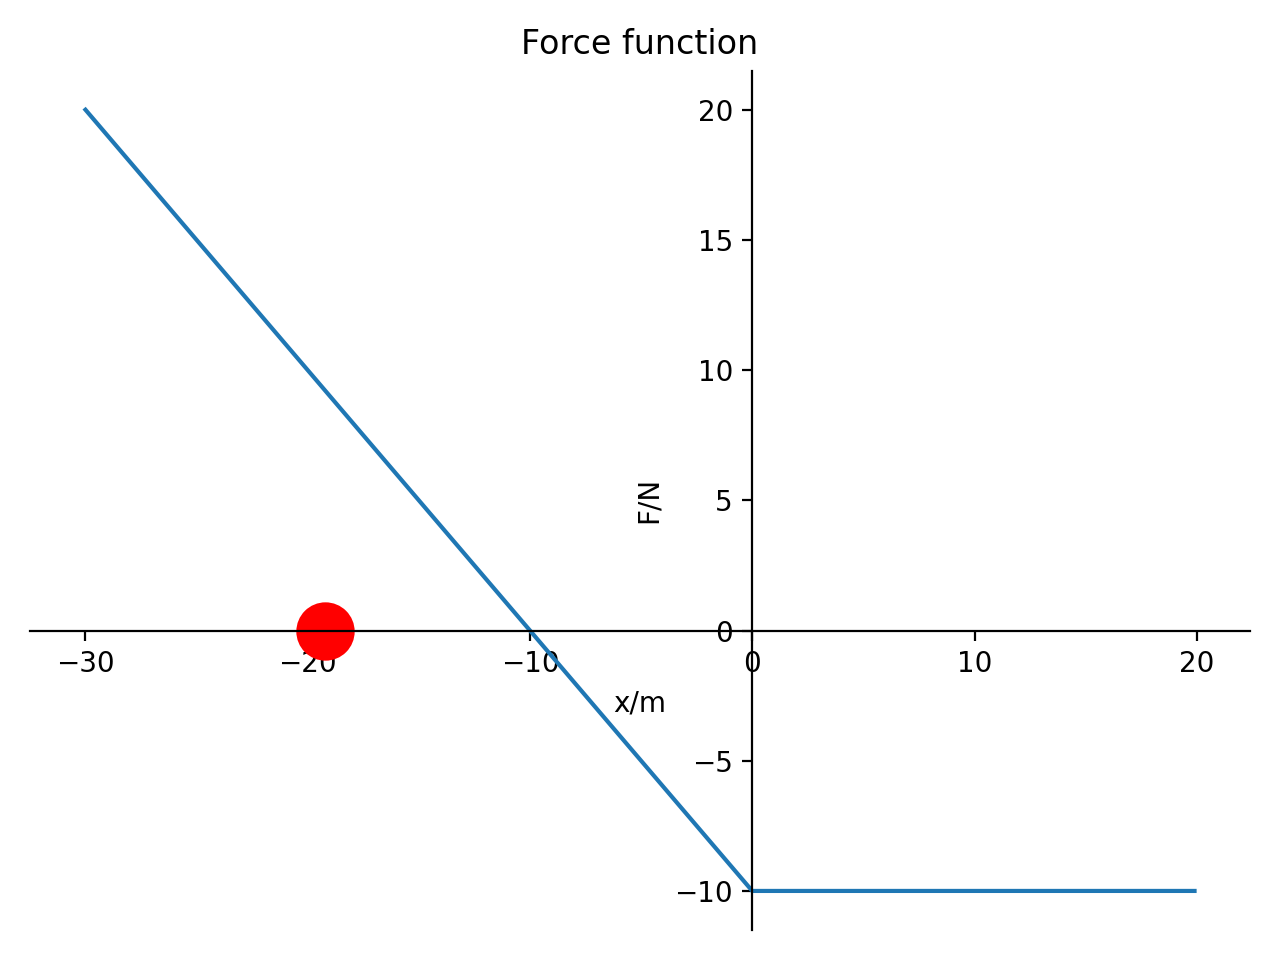

In [9]:
#collapse-hide
initialP = [10,0] # [x,v]
mass = 1

def ivf2(t, P):
    dxdt = P[1] # dx/dt = v
    dvdt = (force2(P[0],P[1]) / mass) # dv/dt = F/m -v/abs(v)
    return [dxdt, dvdt]

t_max = 180
t_range = np.arange(0,t_max,0.1)
sol2 = solve_ivp(ivf2, [0,t_max], initialP,t_eval=t_range) # sol.t, sol.y[0] = x, sol.y[1] = v
from matplotlib import animation
fig6, ax6 = plt.subplots()
ax6.plot(x,f)
ax6.set_xlabel("x/m")
ax6.set_ylabel("F/N")
ax6.set_title("Force function")
ax6.spines['left'].set_position('zero')
ax6.spines['right'].set_color('none')
ax6.spines['bottom'].set_position('zero')
ax6.spines['top'].set_color('none')
fig6.tight_layout()
pt, = ax6.plot([],[],color='r',marker="o", markersize=20)
def update_point2(t):
    pt.set_data(sol2.y[0][t],0)
    return pt,
ani2=animation.FuncAnimation(fig6, update_point2, len(t_range), interval=10, blit=True, repeat=False)

The phase plot allows this to be viewed, settling into SHM around $x=-10$.

<IPython.core.display.Javascript object>


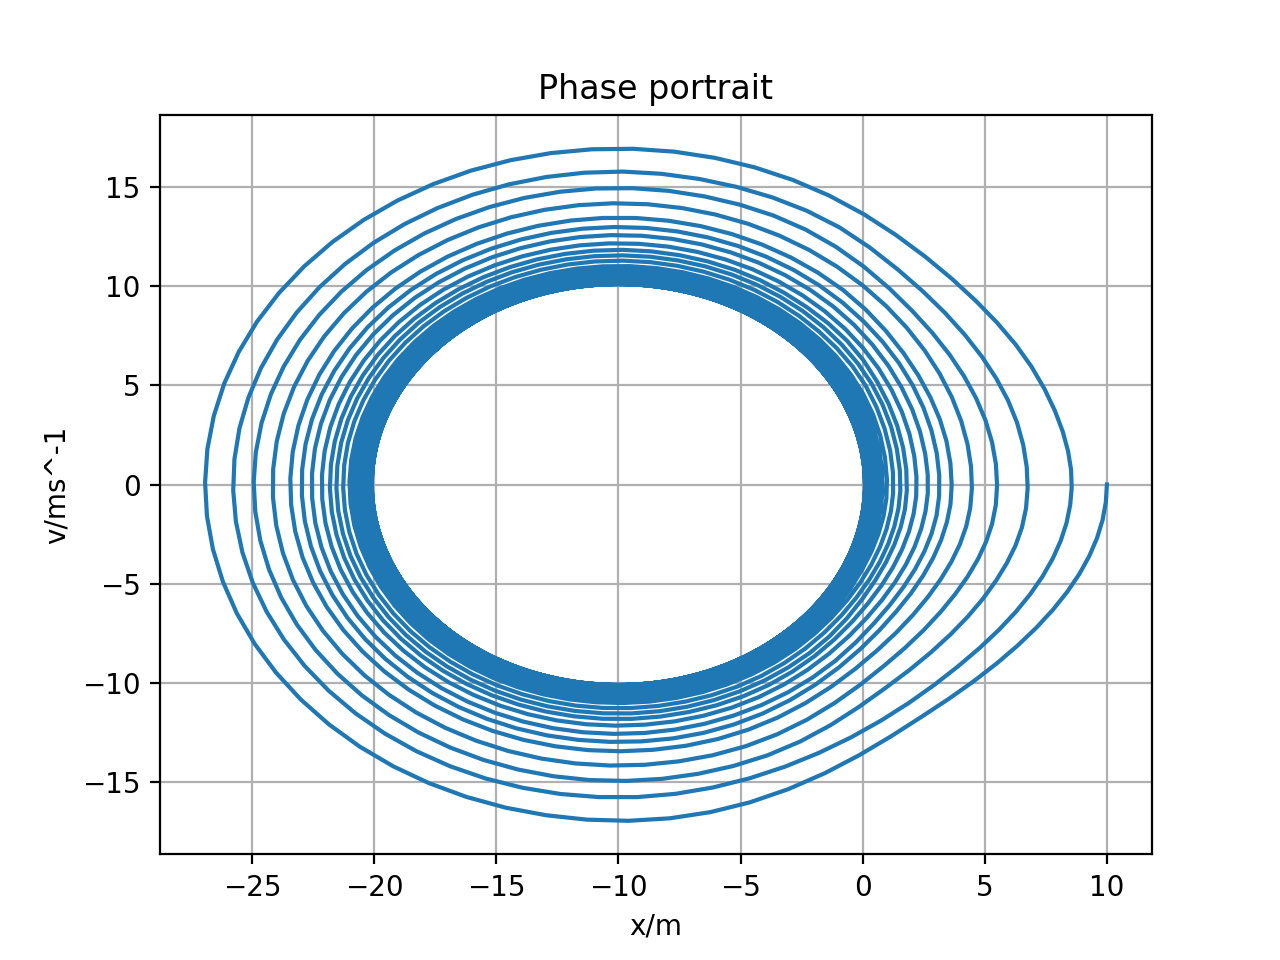

In [10]:
#collapse-hide
fig7, ax7 = plt.subplots()
ax7.set_xlabel("x/m")
ax7.set_ylabel("v/ms^-1")
ax7.set_title("Phase portrait")
ax7.plot(sol2.y[0],sol2.y[1])
ax7.grid()
fig.tight_layout()

## b2 How many meters this point like object travelled during the time when its position coordinate x was ≥ 0?

This requires the realisation that the force when $x>0$ now depends on direction:
$$ F_\text{left} = -9\text{ N}, F_\text{right} = -11\text{ N}$$

Therefore:
$$ 
\frac{1}{2}mv_0^2 = 9x_0 \\
\frac{1}{2}mv_0^2 = 11x_1 => x_1 = \frac{9}{11}x_0 \\
\frac{1}{2}mv_1^2 = 9x_1 \\
\frac{1}{2}mv_1^2 = 11x_2 => x_2 = \frac{9}{11}x_1 = \left(\frac{9}{11}\right)^2x_0\\
$$

This is the start of a geometric series:
$$x_\text{total}= x_0 + 2\left(\frac{9}{11}\right)x_0 + 2\left(\frac{9}{11}\right)^2x_0 + \ldots\\
= \sum_{n=0}^{\infty} 2x_0\left(\frac{9}{11}\right)^n - x_0\\
= \frac{20}{1-\frac{9}{11}} - 10 = 100\text{ m}
$$